In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

Build a model based on census data to determine how certain census data effects bike stations and what would be other good locations to add new bike shares. How many rides based on the area and what is the demographic like around the station

In [2]:
#import the first part of the NY census tract 
data_ny=pd.read_csv('nyc_census_tracts.csv',keep_default_na=False, na_values=[""])
data_ny.head()


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [3]:
data_ny.columns

Index(['CensusTract', 'County', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [4]:
#importing the second part of the census data- the location aspect of the data
data_census=pd.read_csv('census_block_loc.csv',keep_default_na=False, na_values=[""])
data_census.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [5]:
data_census['BlockCode_11'] = data_census['BlockCode'].apply(lambda x: int(str(x)[0:11]))

In [6]:
df= pd.merge(left=data_ny,right= data_census, how='inner', on=None, left_on='CensusTract', right_on='BlockCode_11',
        left_index=False, right_index=False, sort=True,
        suffixes=('_x', '_y'), copy=True, indicator=False,
        validate=None)
df.head()

,CensusTract,County_x,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.887437,360050001001007,Bronx,NY,36005000100
1,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.884271,360050001001005,Bronx,NY,36005000100
2,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.881106,360050001001003,Bronx,NY,36005000100
3,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.877940,360050001001003,Bronx,NY,36005000100
4,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.874774,360050001001006,Bronx,NY,36005000100


In [7]:
df.dtypes

CensusTract          int64
County_x            object
Borough             object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
Latitude           float64
L

In [8]:
# importing Citi Bike share station data
bike=pd.read_csv('201907-citibike-tripdata.csv', keep_default_na=False, na_values=[""])
bike.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493,W 45 St & 6 Ave,40.756800,-73.982912,454,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143,5 Ave & E 78 St,40.776321,-73.964274,3226,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317,E 6 St & Avenue B,40.724537,-73.981854,3469,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1
3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249,Harrison St & Hudson St,40.718710,-74.009001,369,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1
4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552,W 113 St & Broadway,40.805973,-73.964928,3538,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1


In [9]:
#replace the spaces in column names with a '_'
bike.columns = bike.columns.str.replace(' ', '_') 
bike.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493,W 45 St & 6 Ave,40.756800,-73.982912,454,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143,5 Ave & E 78 St,40.776321,-73.964274,3226,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317,E 6 St & Avenue B,40.724537,-73.981854,3469,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1
3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249,Harrison St & Hudson St,40.718710,-74.009001,369,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1
4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552,W 113 St & Broadway,40.805973,-73.964928,3538,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1


In [10]:
bike.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                   int64
gender                       int64
dtype: object

In [11]:
len(bike)

2181064

In [12]:
#new dataset with just station id, lat/long, number of rides

In [13]:
format = "%Y-%m-%dT%H:%M:%S"
start_time = pd.to_datetime(bike["starttime"], format=format)
end_time = pd.to_datetime(bike["stoptime"], format=format)

duration = pd.DatetimeIndex(end_time - start_time)
duration = pd.DataFrame(duration.hour*60 + duration.minute)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """


In [14]:
print(duration.describe())

                  0
count  2.181064e+06
mean   1.488386e+01
std    2.660018e+01
min    1.000000e+00
25%    6.000000e+00
50%    1.000000e+01
75%    1.900000e+01
max    1.436000e+03


In [15]:
bike['trip_duration']=bike['tripduration'].astype(int)


In [16]:
print(bike['trip_duration'].describe())

count    2.181064e+06
mean     1.035360e+03
std      1.077968e+04
min      6.100000e+01
25%      3.850000e+02
50%      6.580000e+02
75%      1.155000e+03
max      2.621244e+06
Name: trip_duration, dtype: float64


In [17]:
bikes = bike["bikeid"].dropna()
print(bikes.value_counts().describe())

count    14356.000000
mean       151.926999
std         80.316472
min          1.000000
25%         99.000000
50%        137.000000
75%        187.000000
max        446.000000
Name: bikeid, dtype: float64


Text(0.5, 1.0, 'Bike Usage for Each Bike')

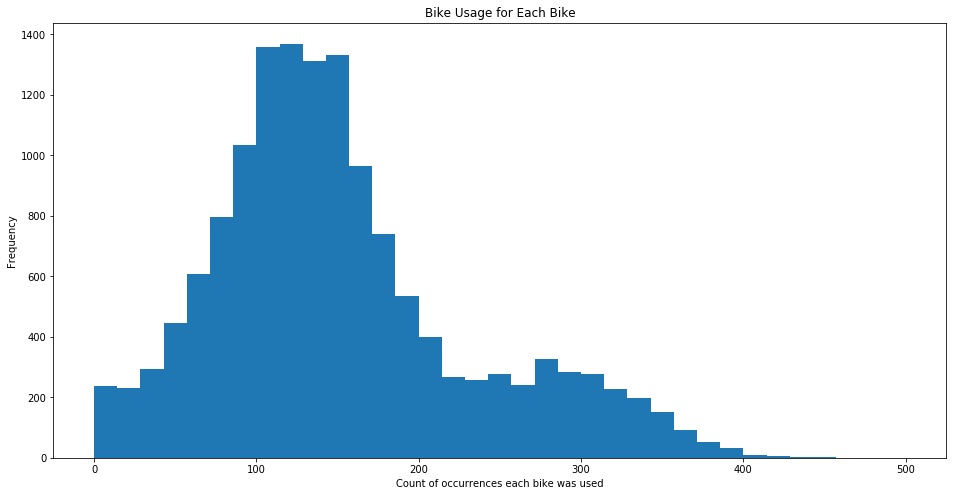

In [18]:
plt.figure(figsize=(16, 8))
bikes.value_counts().plot(kind="hist", bins=35, range=(0,500))
plt.xlabel("Count of occurrences each bike was used")
plt. title ('Bike Usage for Each Bike')

There are 14356 bikes and each has been used on average 152 times. 

In [19]:
from collections import Counter
for days, count in Counter(bike["usertype"].fillna("nan")).items():
    print("days = {}, count = {}, percentage = {}%".format(days, count, int(100*count/len(bike))))


days = Subscriber, count = 1803055, percentage = 82%
days = Customer, count = 378009, percentage = 17%


In [20]:
start_station = bike["start_station_id"].dropna().value_counts()
end_station = bike["end_station_id"].dropna().value_counts()

stations = pd.concat((start_station, end_station), axis=1, sort=False)
stations = stations.reset_index(drop=True)

In [21]:
print (stations)

      start_station_id  end_station_id
0              12451.0           12333
1               9574.0            9782
2               9440.0            9467
3               9408.0           10012
4               9329.0            9601
5               9132.0            9273
6               8711.0            8750
7               8623.0            8326
8               8543.0            8501
9               8197.0            8216
10              7948.0            8204
11              7511.0            7544
12              7421.0            6695
13              7283.0            7312
14              6883.0            6931
15              6771.0            6907
16              6726.0            6714
17              6721.0            6503
18              6720.0            6785
19              6698.0            6630
20              6662.0            6409
21              6658.0            6533
22              6625.0            6571
23              6621.0            6591
24              6593.0   

In [22]:
print(len(stations))

1583


In [23]:
print(stations.corr())

                  start_station_id  end_station_id
start_station_id          1.000000        0.998435
end_station_id            0.998435        1.000000


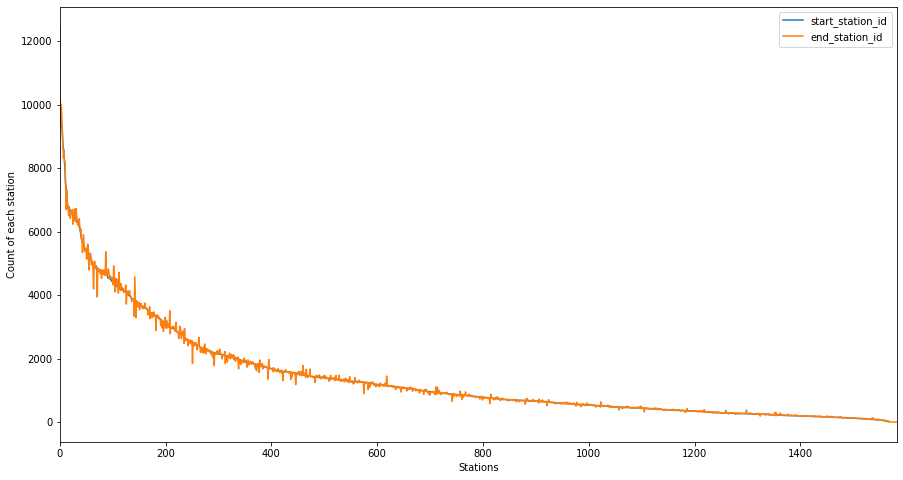

In [24]:
stations.plot(figsize=(15, 8))
plt.xlabel("Stations")
plt.ylabel("Count of each station")
plt.legend()

In [25]:
#determining the distance between bike stations 
from math import sin, cos, sqrt, atan2, radians

lat1 = bike["start_station_latitude"].apply(radians)
lon1 = bike["start_station_longitude"].apply(radians)
lat2 = bike["end_station_latitude"].apply(radians)
lon2 = bike["end_station_longitude"].apply(radians)

dlon = lon2 - lon1
dlat = lat2 - lat1

R = 6373.0

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

bike['distance'] = R * c

In [26]:
bike["distance"].describe()

count    2.181064e+06
mean     1.819484e+00
std      1.450128e+00
min      0.000000e+00
25%      8.332764e-01
50%      1.403231e+00
75%      2.373937e+00
max      1.671231e+01
Name: distance, dtype: float64

Text(0.5, 1.0, 'Average Distance Per Ride')

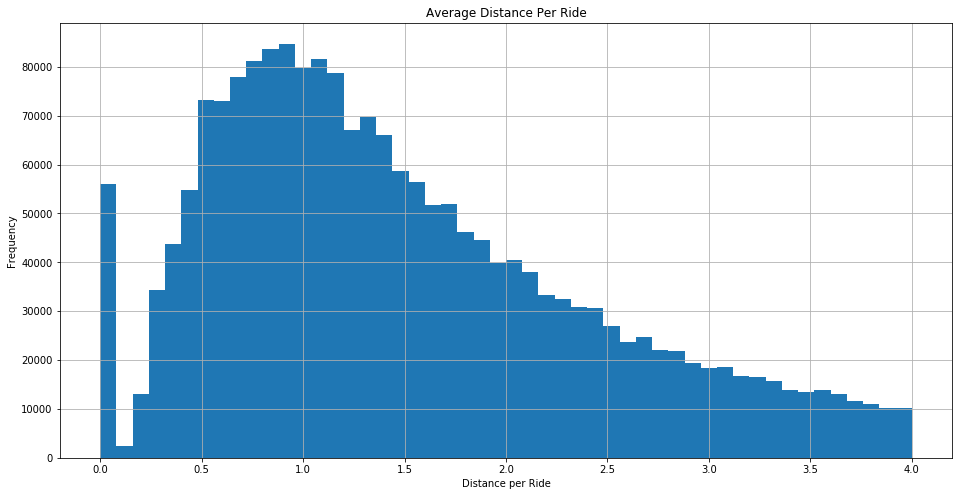

In [27]:
plt.figure(figsize=(16, 8))
bike.distance.hist(range=(0,4), bins=50)
plt.xlabel("Distance per Ride")
plt.ylabel('Frequency')
plt.title ('Average Distance Per Ride')

Shows that the average/ mean ride from the stations are slightly under 2km per ride. So most likely riding from one station to another station. 

Finding the distance from start station latitude and longitude to the borough lat/long (where end station is) and then keep stations that are closest to that borough lat/long

In [28]:
df_bike = bike.groupby(['start_station_id', 'start_station_latitude','start_station_longitude']).agg('count')['tripduration']
print (df_bike)

start_station_id  start_station_latitude  start_station_longitude
72                40.767272               -73.993929                 3607
79                40.719116               -74.006667                 2082
82                40.711174               -74.000165                 1214
83                40.683826               -73.976323                 1623
116               40.741776               -74.001497                 5761
119               40.696089               -73.978034                  454
120               40.686768               -73.959282                  916
127               40.731724               -74.006744                 4880
128               40.727103               -74.002971                 5565
143               40.692395               -73.993379                 1978
144               40.698399               -73.980689                  873
146               40.716250               -74.009106                 2558
150               40.720874               -73.

In [29]:
df_bike = df_bike.reset_index()

In [30]:
df_bike.head()

,start_station_id,start_station_latitude,start_station_longitude,tripduration
0,72,40.767272,-73.993929,3607
1,79,40.719116,-74.006667,2082
2,82,40.711174,-74.000165,1214
3,83,40.683826,-73.976323,1623
4,116,40.741776,-74.001497,5761


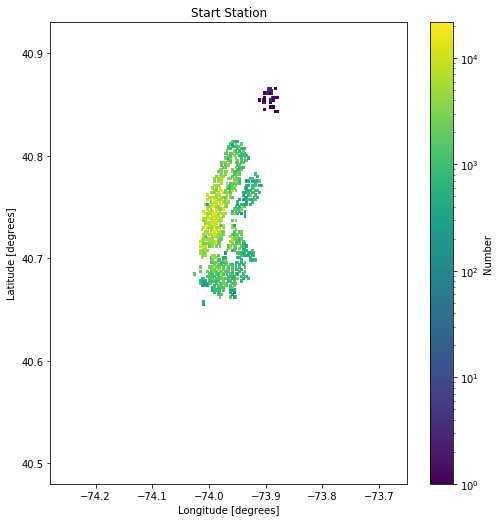

In [31]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
ratio = np.cos(40.7 * np.pi/180) * np.abs(lonmax-lonmin) /np.abs(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(bike.start_station_longitude,bike.start_station_latitude,bins=199,
                  range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Start Station')
plt.colorbar(label='Number')
plt.show()

A map of all the start stations in NYC, showing the majority of them in Manhattan. 

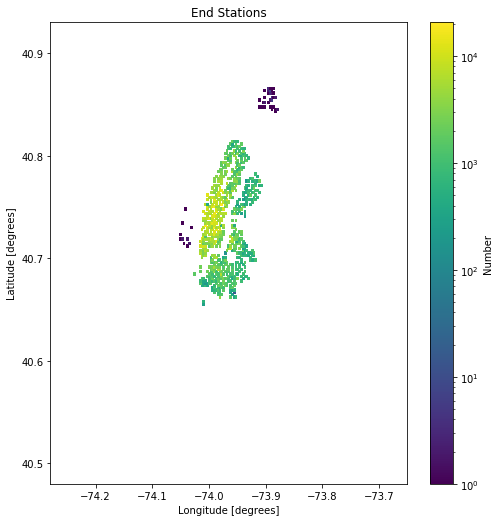

In [32]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
ratio = np.cos(40.7 * np.pi/180) * np.abs(lonmax-lonmin) /np.abs(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(bike.end_station_longitude,bike.end_station_latitude,bins=199,
                  range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('End Stations')
plt.colorbar(label='Number')
plt.show()

A map of all the end stations in NYC, showing a few more in Jersey City.

In [33]:
lat1 = bike["start_station_latitude"].apply(radians)
lon1 = bike["start_station_longitude"].apply(radians)
lat2 = df["Latitude"].apply(radians)
lon2 = df["Longitude"].apply(radians)

dlon = lon2 - lon1
dlat = lat2 - lat1

R = 6373.0

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

bike['borough_diff'] = R * c

In [34]:
bike["borough_diff"].describe()

count    18052.000000
mean        17.393047
std          7.286242
min          0.126213
25%         12.391253
50%         17.706913
75%         22.313421
max         43.270509
Name: borough_diff, dtype: float64

Text(0, 0.5, 'Frequency')

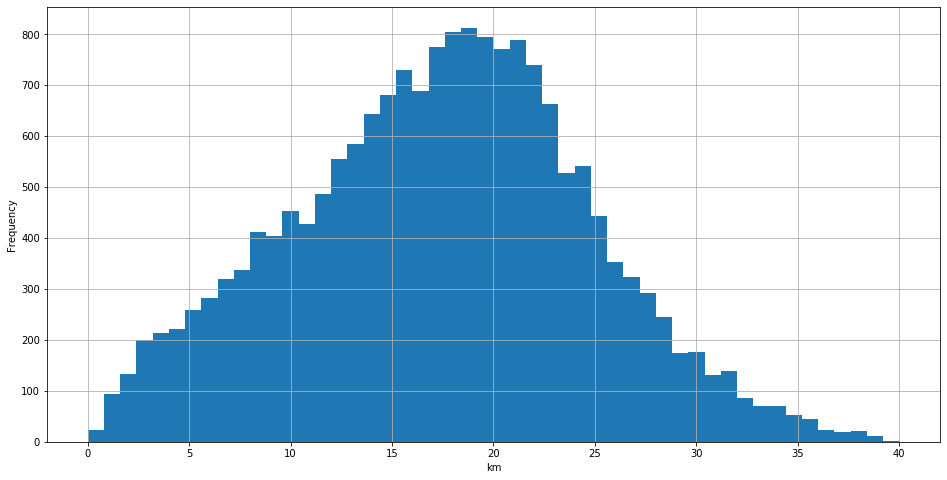

In [35]:
plt.figure(figsize=(16, 8))
bike.borough_diff.hist(range=(0,40), bins=50)
plt.xlabel("km")
plt.ylabel('Frequency')

In [36]:
#create a temporary column to merge the 2 datasets on as there aren't common columns
df['tmp'] = 'tmp'
print(df)

       CensusTract  County_x        Borough  TotalPop   Men  Women  Hispanic  \
0      36005000100     Bronx          Bronx      7703  7133    570      29.9   
1      36005000100     Bronx          Bronx      7703  7133    570      29.9   
2      36005000100     Bronx          Bronx      7703  7133    570      29.9   
3      36005000100     Bronx          Bronx      7703  7133    570      29.9   
4      36005000100     Bronx          Bronx      7703  7133    570      29.9   
5      36005000100     Bronx          Bronx      7703  7133    570      29.9   
6      36005000100     Bronx          Bronx      7703  7133    570      29.9   
7      36005000100     Bronx          Bronx      7703  7133    570      29.9   
8      36005000100     Bronx          Bronx      7703  7133    570      29.9   
9      36005000100     Bronx          Bronx      7703  7133    570      29.9   
10     36005000100     Bronx          Bronx      7703  7133    570      29.9   
11     36005000100     Bronx          Br

In [37]:
df_bike['tmp'] = 'tmp'
print(df_bike)

     start_station_id  start_station_latitude  start_station_longitude  \
0                  72               40.767272               -73.993929   
1                  79               40.719116               -74.006667   
2                  82               40.711174               -74.000165   
3                  83               40.683826               -73.976323   
4                 116               40.741776               -74.001497   
5                 119               40.696089               -73.978034   
6                 120               40.686768               -73.959282   
7                 127               40.731724               -74.006744   
8                 128               40.727103               -74.002971   
9                 143               40.692395               -73.993379   
10                144               40.698399               -73.980689   
11                146               40.716250               -74.009106   
12                150               40

In [38]:
df_bike.columns

Index(['start_station_id', 'start_station_latitude', 'start_station_longitude',
       'tripduration', 'tmp'],
      dtype='object')

In [39]:
NY_bike= pd.merge(left=df_bike,right= df, how='outer',left_on= 'tmp', right_on= 'tmp', left_index=False, right_index=False)
NY_bike.head()

,start_station_id,start_station_latitude,start_station_longitude,tripduration,tmp,CensusTract,County_x,Borough,TotalPop,Men,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11
0,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,NaN,40.787538,-73.887437,360050001001007,Bronx,NY,36005000100
1,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,NaN,40.787538,-73.884271,360050001001005,Bronx,NY,36005000100
2,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,NaN,40.787538,-73.881106,360050001001003,Bronx,NY,36005000100
3,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,NaN,40.787538,-73.877940,360050001001003,Bronx,NY,36005000100
4,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,NaN,40.787538,-73.874774,360050001001006,Bronx,NY,36005000100


In [40]:
len(NY_bike)

28829044

In [41]:
NY_bike.dtypes

start_station_id            object
start_station_latitude     float64
start_station_longitude    float64
tripduration                 int64
tmp                         object
CensusTract                  int64
County_x                    object
Borough                     object
TotalPop                     int64
Men                          int64
Women                        int64
Hispanic                   float64
White                      float64
Black                      float64
Native                     float64
Asian                      float64
Citizen                      int64
Income                     float64
IncomeErr                  float64
IncomePerCap               float64
IncomePerCapErr            float64
Poverty                    float64
ChildPoverty               float64
Professional               float64
Service                    float64
Office                     float64
Construction               float64
Production                 float64
Drive               

In [42]:
lat1 = pd.to_numeric(NY_bike["start_station_latitude"],errors='coerce').apply(radians)
lon1 = pd.to_numeric(NY_bike["start_station_longitude"],errors='coerce').apply(radians)
lat2 = pd.to_numeric(NY_bike["Latitude"],errors='coerce').apply(radians)
lon2 = pd.to_numeric(NY_bike["Longitude"],errors='coerce').apply(radians)

dlon = lon2 - lon1
dlat = lat2 - lat1

R = 6373.0

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

NY_bike['borough_distance'] = R * c

In [43]:
NY_bike["borough_distance"].describe()

count    2.882904e+07
mean     1.735797e+01
std      7.826895e+00
min      6.322936e-03
25%      1.174496e+01
50%      1.730809e+01
75%      2.244763e+01
max      5.234755e+01
Name: borough_distance, dtype: float64

Text(0, 0.5, 'Frequency')

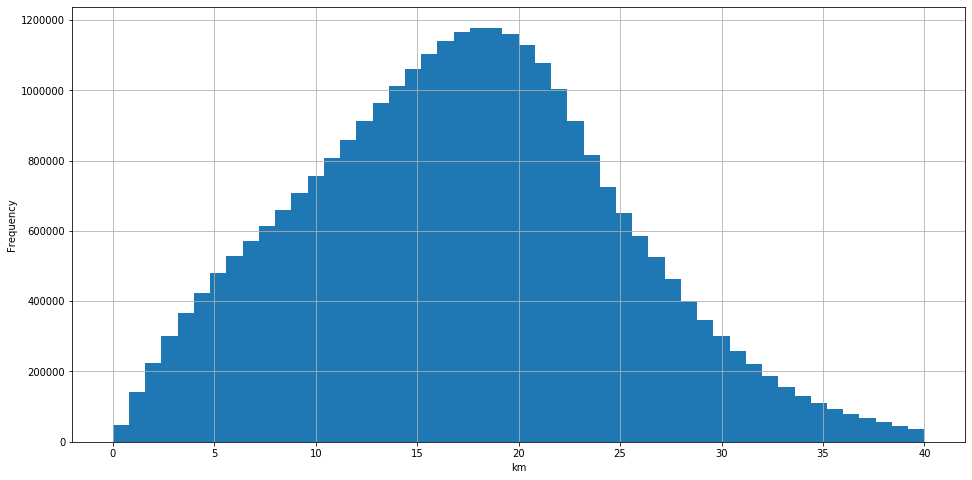

In [44]:
plt.figure(figsize=(16, 8))
NY_bike.borough_distance.hist(range=(0,40), bins=50)
plt.xlabel("km")
plt.ylabel('Frequency')

In [45]:
NY_bike.head()

,start_station_id,start_station_latitude,start_station_longitude,tripduration,tmp,CensusTract,County_x,Borough,TotalPop,Men,...,SelfEmployed,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11,borough_distance
0,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,40.787538,-73.887437,360050001001007,Bronx,NY,36005000100,9.248599
1,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,40.787538,-73.884271,360050001001005,Bronx,NY,36005000100,9.507435
2,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,40.787538,-73.881106,360050001001003,Bronx,NY,36005000100,9.766691
3,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,40.787538,-73.877940,360050001001003,Bronx,NY,36005000100,10.026336
4,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,NaN,40.787538,-73.874774,360050001001006,Bronx,NY,36005000100,10.286339


In [46]:
#grouping the data by the borough distance and start station ids
g = NY_bike.sort_values(['borough_distance']).groupby('start_station_id') 

In [47]:
NY_bike['distance_rank'] = g['borough_distance'].rank(method='min', na_option='top')

In [48]:
NY_bike.head()

,start_station_id,start_station_latitude,start_station_longitude,tripduration,tmp,CensusTract,County_x,Borough,TotalPop,Men,...,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11,borough_distance,distance_rank
0,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,40.787538,-73.887437,360050001001007,Bronx,NY,36005000100,9.248599,2125.0
1,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,40.787538,-73.884271,360050001001005,Bronx,NY,36005000100,9.507435,2242.0
2,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,40.787538,-73.881106,360050001001003,Bronx,NY,36005000100,9.766691,2355.0
3,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,40.787538,-73.877940,360050001001003,Bronx,NY,36005000100,10.026336,2477.0
4,72,40.767272,-73.993929,3607,tmp,36005000100,Bronx,Bronx,7703,7133,...,NaN,NaN,40.787538,-73.874774,360050001001006,Bronx,NY,36005000100,10.286339,2600.0


In [49]:
#create a dataframe with the bike distances and start stations within in them. Looking for
#stations 1km or less 
NY_bike_close=NY_bike[NY_bike.distance_rank <= 1]
NY_bike_close.head()

,start_station_id,start_station_latitude,start_station_longitude,tripduration,tmp,CensusTract,County_x,Borough,TotalPop,Men,...,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11,borough_distance,distance_rank
6521,72,40.767272,-73.993929,3607,tmp,36061013500,New York,Manhattan,6384,3286,...,0.0,5.7,40.767186,-73.995075,360610135002005,New York,NY,36061013500,0.097058,1.0
24197,79,40.719116,-74.006667,2082,tmp,36061003300,New York,Manhattan,5005,2490,...,0.0,3.5,40.719698,-74.007739,360610033003015,New York,NY,36061003300,0.111235,1.0
42233,82,40.711174,-74.000165,1214,tmp,36061002900,New York,Manhattan,6050,3671,...,0.0,3.3,40.710653,-74.001407,360610029004022,New York,NY,36061002900,0.119646,1.0
56934,83,40.683826,-73.976323,1623,tmp,36047012901,Kings,Brooklyn,2577,1102,...,0.0,5.7,40.683518,-73.976080,360470129011002,Kings,NY,36047012901,0.039960,1.0
78536,116,40.741776,-74.001497,5761,tmp,36061008300,New York,Manhattan,3929,1534,...,0.0,11.3,40.742312,-74.001407,360610083001000,New York,NY,36061008300,0.060052,1.0


In [50]:
NY_bike_close.to_csv('NY_bike_close.csv')

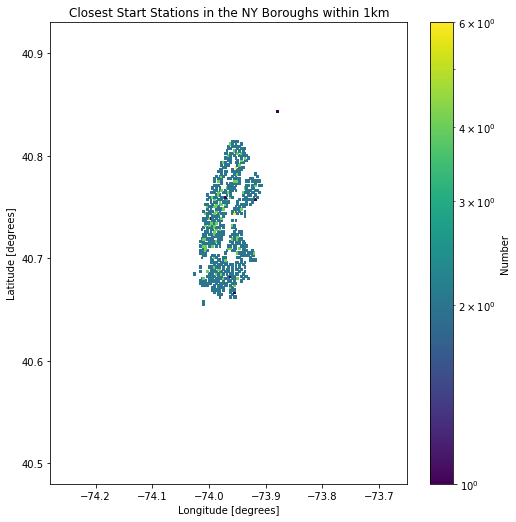

In [51]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
ratio = np.cos(40.7 * np.pi/180) * np.abs(lonmax-lonmin) /np.abs(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(NY_bike_close.start_station_longitude,NY_bike_close.start_station_latitude,bins=199,
                  range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Closest Start Stations in the NY Boroughs within 1km')
plt.colorbar(label='Number')
plt.show()